### Installation

In [1]:
!pip install beautifulsoup4
!pip install requests


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup as bs
import time


In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
}
url = "https://www.kayak.com/hotels/Milan,Milano,Italy-p43247/2024-12-29/2025-01-02/1adults;map?sort=rank_a"

r = requests.get(url, headers=headers)

if r.status_code == 403:
    print("Request forbidden!")

elif r.status_code == 200:
    print('Success')
else:
    print(r.status_code)



Success


In [46]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Configure Selenium options
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--no-sandbox")  
chrome_options.add_argument("--disable-dev-shm-usage")  

# Path to my Chrome driver
service = Service("/snap/bin/chromium.chromedriver")

hotel_url_list = []
hotel_name_list = []
hotel_image_list = []
hotel_price_list = []
hotel_rating_list =[]
hotel_review_score_list = []

url = "https://www.kayak.com/hotels/Milan,Milano,Italy-p43247/2024-12-29/2025-01-02/1adults;map?sort=rank_a"

driver = webdriver.Chrome(service=service)
driver.get(url) 

root_url = "https://www.kayak.com"

# Loop for 2 for pages

for i in range(2):  

        soup = bs(driver.page_source, 'html.parser')

        # Finding the sections that contain the hotel data
        hotels = soup.find_all('div', class_="S0Ps S0Ps-mod-flexible-height")
        
        time.sleep(15)

        for hotel in hotels:
            
            hotel_name = hotel.find('a', class_="FLpo-big-name").text

            review_score = hotel.find('div', class_="wdjx wdjx-positive wdjx-mod-rating-condensed")
            review_score = float(review_score.text) if review_score else None
            
            price = hotel.find('div', class_="c1XBO").text
            price = float(price.replace('€', '').replace(',', '').replace('$','').strip())
            
            image = hotel.find('img', class_="f800-image")["src"]

            rating = hotel.find('span', class_="Ius0")
            rating = int(rating.text[0]) if rating else None

            hotel_url = root_url + hotel.find('a', class_="FLpo-big-name")['href']

            hotel_url_list.append(hotel_url)
            hotel_name_list.append(hotel_name)
            hotel_image_list.append(image)
            hotel_price_list.append(price)
            hotel_rating_list.append(rating)
            hotel_review_score_list.append(review_score)

        # Finding the "Next page" button 
        buttons = driver.find_elements(By.CSS_SELECTOR, 
                      "button.Iqt3-mod-variant-none.Iqt3-mod-theme-light.Iqt3-mod-shape-rounded-small.Iqt3-mod-shape-mod-default.Iqt3-mod-spacing-default")
        next_button = buttons[-1]

        # Scrolling the button into view
        driver.execute_script("arguments[0].scrollIntoView(true);", next_button)

        # Clicking the button via JavaScript
        driver.execute_script("arguments[0].click();", next_button)
        
        # Allowing the next page to load
        time.sleep(15)  

driver.quit()


In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bs

# Set up headless Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')

# Path to my ChromeDriver
chrome_service = Service('/snap/bin/chromium.chromedriver')  

hotel_image_list = []
hotel_address_list = []
hotel_summary_list = []

# List of hotel URLs to scrape
hotel_urls = hotel_url_list

# Loop over each hotel URL
for index, hotel_url in enumerate(hotel_urls, start=1):
    
    # Starting a new WebDriver instance for each URL to avoid session issues
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    # Fetching the webpage for the current URL
    driver.get(hotel_url)

    # Getting the page source after JavaScript loads
    page_source = driver.page_source

    # Parsing the content with BeautifulSoup
    hotel_soup = bs(page_source, 'html.parser')

    # Finding the section that contains the image data
    hotel_page = hotel_soup.find('section', {"id": "overviewSection"})
    h_images = []
    summary = None
    address = None
    if hotel_page:  

        address = hotel_soup.find('div', class_="c3xth-address").text

        summary = hotel_soup.find('div', class_="b40a-desc-text")
        if summary:
            summary = summary.text

        image_container = hotel_page.find('div', {"class": "c1E0k-photo-container"})

        iBaseUrl = "https://content.r9cdn.net"
        if image_container:
            
            # Finding the image tag within the container
            img_tag = image_container.find_all('img', {"class": "f800-image"})
            h_images = []
            for i in range(1, len(img_tag)):
                h_images.append(iBaseUrl + img_tag[i]['src'])
                if i==3: 
                    break
                    
        hotel_image_list.append(h_images)
        hotel_address_list.append(address)
        hotel_summary_list.append(summary)
        
        driver.quit()



In [49]:
print(len(hotel_address_list))

60


In [50]:
# Importing numpy to use the fillna and isna methods
import numpy as np
import pandas as pd
df = pd.DataFrame({'name': hotel_name_list, 'price (in $)': hotel_price_list, 'rating (out of 5)': hotel_rating_list,
                   'review score': hotel_review_score_list, 'address': hotel_address_list, 
                   'images':hotel_image_list, 'summary': hotel_summary_list})

# Making copy of the original dataframe in local device for backup
# df.to_csv("kayakdotcom_with_missing_values.csv")
df["rating (out of 5)"] = df["rating (out of 5)"].fillna(value=np.nan)
df["rating (out of 5)"] = df["rating (out of 5)"].fillna(df["rating (out of 5)"].median())
df["rating (out of 5)"] = df["rating (out of 5)"].astype(int)

# Saving the datafram after replacing the missing values 
# df.to_csv("Kayakdotcom_without_missing_values.csv")
df.head()

,name,price (in $),rating (out of 5),review score,address,images,summary
0,Hotel Viu Milan,1336.0,5,8.9,"Via Fioravanti, 6, 20154 Milan, Milano",[https://content.r9cdn.net/rimg/himg/be/d1/81/...,Ideally located in the prime touristic area of...
1,Nyx Hotel Milan By Leonardo Hotels,962.0,4,8.5,"Piazza IV Novembre 3, 20124 Milan, Milano",[https://content.r9cdn.net/rimg/himg/39/1e/e0/...,"Featuring an inner garden, NYX Hotel Milan by ..."
2,Enterprise Hotel Design & Boutique,801.0,4,8.6,"Corso Sempione 91, 20149 Milan, Milano",[https://content.r9cdn.net/rimg/himg/95/a5/64/...,"Upscale spa hotel, a quick walk to Fiera Milan..."
3,Hotel Sanpi Milano,766.0,4,8.2,"Via Lazzaro Palazzi, 18, 20124 Milan, Milano",[https://content.r9cdn.net/rimg/himg/57/2a/9d/...,"Upscale hotel, a short walk to Corso Buenos Ai..."
4,"The Westin Palace, Milan",1638.0,5,8.0,"Piazza della Repubblica 20, 20124 Milan, Milano",[https://content.r9cdn.net/rimg/himg/5a/e0/6f/...,Step over the threshold of The Westin Palace t...


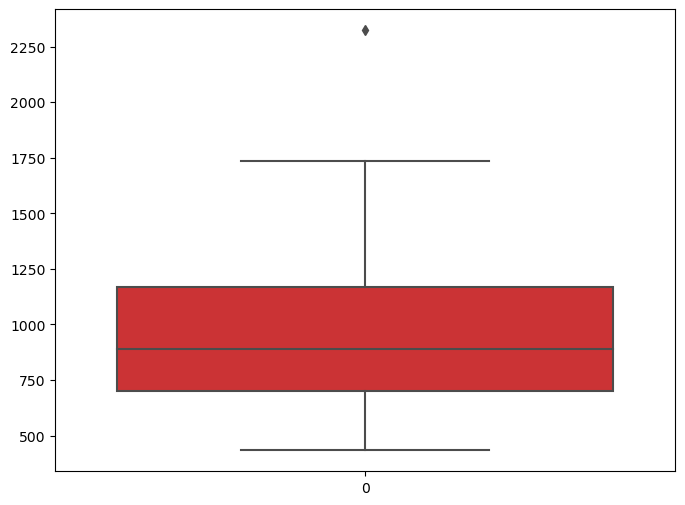

In [51]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")

plt.figure(figsize=(8, 6))
sns.boxplot(df['price (in $)'])

plt.show()

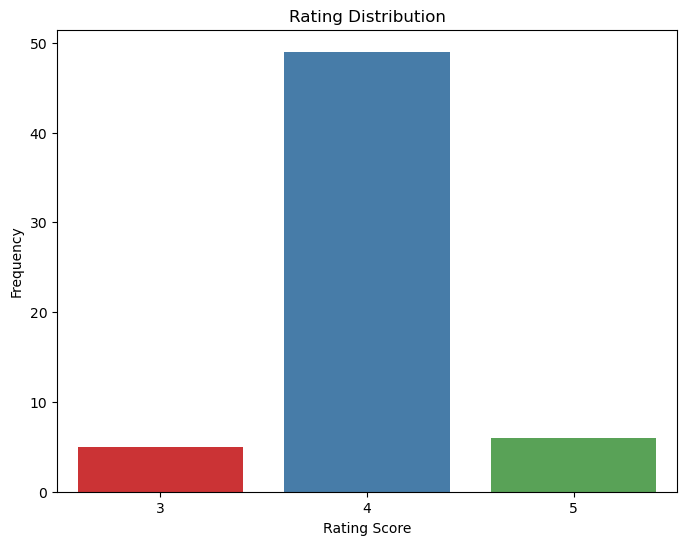

In [52]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")
plt.figure(figsize=(8, 6))
rating_counts = df['rating (out of 5)'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Rating Distribution')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

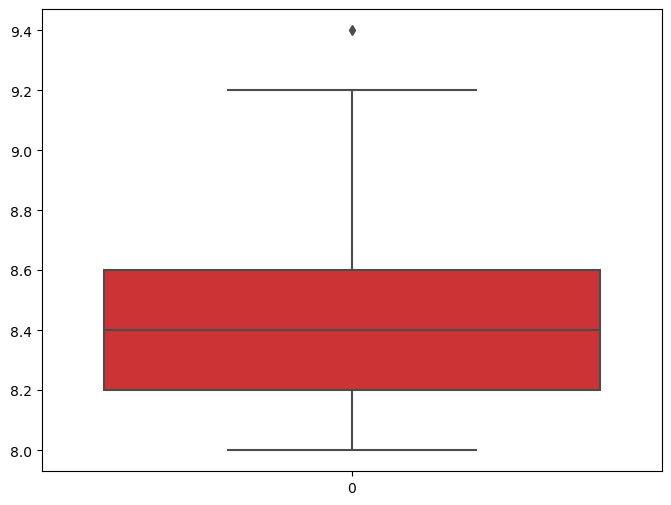

In [53]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")

plt.figure(figsize=(8, 6))
sns.boxplot(df['review score'])

plt.show()

In [54]:
from IPython.display import Image, display, HTML

price_min = float(input("Enter lowest price value: "))
price_max = float(input("Enter highest price value: "))
review_min = float(input("Enter minimum review score value (1 - 10): "))
review_max = float(input("Enter maximum review score value (1 - 10): "))
rating_min = int(input("Enter the minimum hotel rating (out of 5) value: "))



# Filtering the DataFrame based on user input
new_df = df[(df['price (in $)'] >= price_min) & (df['price (in $)'] <= price_max) &
            (df['review score'] >= review_min) & (df['review score'] <= review_max) &
            (df['rating (out of 5)'].astype('int') >= rating_min)
           ]

def sort_by(input_value):
    if input_value == 1:
        return "price (in $)"
    if input_value == 2:
        return "review score"
    if input_value == 3:
        return "rating (out of 5)"
    else:
        return "price (in $)"
        
input_value = float(input("How do you want it to be sorted by?: \n Enter 1 to sort it by price  \n Enter 2 to sort it by review score \n Enter 3 to sort it by rating \n"))

# Sorting by price and distance in a ascending order but
# sort them in descending order if sorted by review score 
asc = False
if input_value == 1:
    asc = True
sorted_df = new_df.sort_values(by=sort_by(input_value), ascending=asc)

# Output the first sorted 10 hotels 
result = sorted_df.head(10)

print(f"\n======================= RESULTS sorted by {sort_by(input_value)}=========================\n")


# Checking if the search parameter doesn't hold true
def display_hotel_details(row):
  image = None
  if row['images']:
        image = row['images'][0]
  html = f"""
  <div style="display: flex; align-items: center; margin-bottom: 20px;">
          <img src="{image}" alt="{row['name']}" style="width: 200px; height: auto; margin-right: 20px;">
      <div>
          <h4 style="font-size:18px"> <strong>{row['name']}</strong></h4><br>
          <i><strong>Price (in $):</strong></i> {row['price (in $)']}<br>
          <i><strong>Review Score:</strong></i> {row['review score']}<br>
          <i><strong>Rating (out of 5):</strong></i> {row['rating (out of 5)']}<br>
          <i><strong>Address:</strong></i> {row['address']}<br>
      </div>
  </div>
  """
  display(HTML(html))

    
# Display three more pictures of the hotel when a user wants to see details of a particular hotel    
def display_more_hotel_pictures(row):
    print("Here some more photos of the hotel :)")
    html = """
    <div style="display: flex; align-items: center; margin-bottom: 20px;">
    """
    for i in range(1, len(row['images'])):
        html += f"""
        <div style="margin-right: 20px;">
            <img src="{row['images'][i]}" alt="{row['name']}" style="width: 200px; height: auto;">
        </div>
        """
    html += """
    </div>
    """
    
    html += f"""
    <div>
        <p style="font-size: 16px; color: #555;">{row['summary']}</p>
    </div>
    """
    
    display(HTML(html))

# Check result is not empty        
if result.empty:
  print("Nothing to display :)")
else:
  # Call a function to display the hotel details of  
  for index, row in result.iterrows():
      display_hotel_details(row)
  print("\n")
  hotel_name = input("Enter full name of the hotel to see more details: ")
  hotel = df[df['name']==hotel_name]
    
  # Change the dataframe to series  
  if not hotel.empty:
    hotel = hotel.iloc[0,:]
    print("\n\n +++++++++++++++++++++++ More detailed info +++++++++++++++++++")
    display_hotel_details(hotel)
    display_more_hotel_pictures(hotel)
  else: 
    print("\n Try another name or please write the full name of the hotel")
    

Enter lowest price value: 0
Enter highest price value: 10000
Enter minimum review score value (1 - 10): 5
Enter maximum review score value (1 - 10): 10
Enter the minimum hotel rating (out of 5) value: 4
How do you want it to be sorted by?: 
 Enter 1 to sort it by price  
 Enter 2 to sort it by review score 
 Enter 3 to sort it by rating 
2

======================= RESULTS sorted by review score=========================





Enter full name of the hotel to see more details: Milano Verticale | Una Esperienze


 +++++++++++++++++++++++ More detailed info +++++++++++++++++++


Here some more photos of the hotel :)
